In [7]:
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

# from rpy2.robjects.packages import importr
# igraph = importr('igraph')
# import pandas as pd
# from rpy2.robjects import r, pandas2ri
# a = pandas2ri.py2ri(nx.to_pandas_adjacency(nxG))

import os
import numpy as np
import rpy2.robjects as robjects

In [8]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read_graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- cluster_fast_greedy(G, 
                    merges = TRUE, 
                    modularity = TRUE, 
                    membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                c <- cluster_infomap(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)

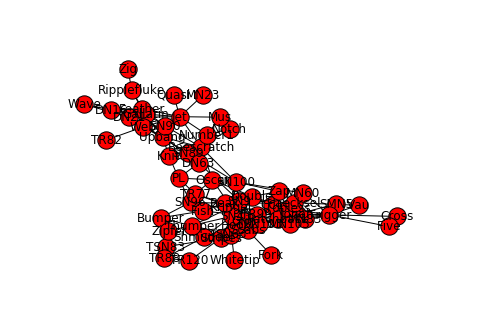

In [9]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('dolphins.gml')

nx.draw(G,with_labels=True)
plt.show()

In [10]:
labels_infomap = community(G, "infomap")
labels_fastGreedy = community(G, "fast_greedy")
labels_edgeBetweenness = community(G, "edge_betweenness")
labels_louvain = community(G, "louvain")

In [19]:
labels_infomap

array([ 5.,  3.,  1.,  1.,  2.,  1.,  4.,  2.,  3.,  3.,  3.,  3.,  1.,
        2.,  5.,  5.,  2.,  2.,  1.,  3.,  1.,  1.,  1.,  2.,  1.,  1.,
        2.,  1.,  3.,  4.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,
        1.,  4.,  1.,  3.,  2.,  3.,  1.,  2.,  3.,  4.,  1.,  2.,  1.,
        2.,  3.,  1.,  4.,  5.,  4.,  3.,  4.,  5.,  1.])

                                               (e) Kamada kawai layout


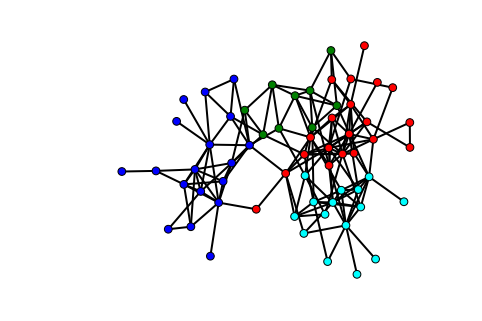

In [50]:
#Louvin

attributes = []
color_map = []
for nom in G.nodes():
    attributes.append([nom])
    
for node in labels_louvain:
    if node == 1.:
        color_map.append('blue')
    elif node ==2.:
        color_map.append('red')
    elif node == 3.:
        color_map.append('green')
    elif node == 4.:
        color_map.append('cyan')
    elif node == 5.:
        color_map.append('yellow')
    else:
        color_map.append('brown')
          

for i in range(len(attributes)):
    G.nodes[attributes[i][0]]['Cluster'] = labels_louvain[i]

options = {
'node_size': 60,
'width': 2,
}

print("                                               (e) Kamada kawai layout")
nx.draw_kamada_kawai(G,node_color = color_map, **options)
plt.show()

                                               (e) Kamada kawai layout


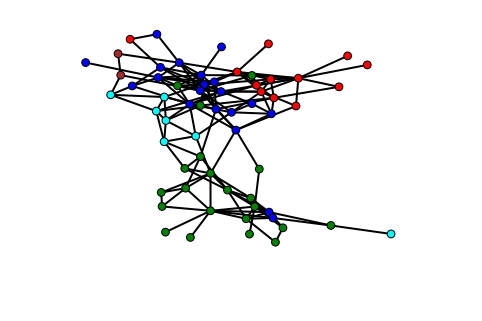

In [14]:
#betweenness
G_eb=G.copy()
color_map_eb = []

attributes_1 = []
color_map_eb = []
for nom in G_eb.nodes():
    attributes_1.append([nom])
    
    
for node in labels_edgeBetweenness:
    if node == 1.:
        color_map_eb.append('blue')
    elif node ==2.:
        color_map_eb.append('red')
    elif node == 3.:
        color_map_eb.append('green')
    elif node == 4.:
        color_map_eb.append('cyan')
    else:
        color_map_eb.append('brown')
          

for i in range(len(attributes_1)):
    G_eb.nodes[attributes_1[i][0]]['Cluster'] = labels_edgeBetweenness[i]

options = {
'node_size': 60,
'width': 2,
}

print("                                               (e) Kamada kawai layout")
nx.draw(G_eb,node_color = color_map_eb, **options)
plt.show()

In [73]:
attributes[0][0]


'Cross'

                                               (e) Kamada kawai layout


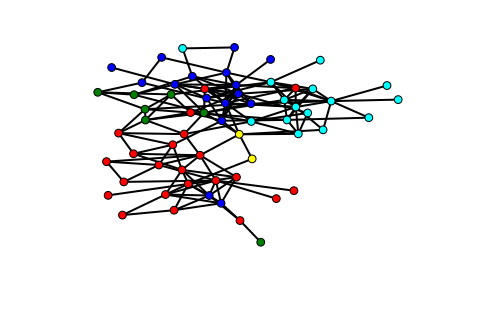

In [51]:
#fast greeedy
G_fg=G.copy()
color_map_fg = []

attributes_3 = []
color_map_fg = []
for (nom,com) in partition.items():
    attributes_3.append([nom])
    
    
for node in labels_fastGreedy:
    if node == 1.:
        color_map_fg.append('blue')
    elif node ==2.:
        color_map_fg.append('red')
    elif node == 3.:
        color_map_fg.append('green')
    elif node == 4.:
        color_map_fg.append('cyan')
    else:
        color_map_fg.append('yellow')
          

for i in range(len(attributes)):
    G_fg.nodes[attributes_3[i][0]]['Cluster'] = labels_fastGreedy[i]

options = {
'node_size': 60,
'width': 2,
}

print("                                               (e) Kamada kawai layout")
nx.draw_kamada_kawai(G_fg,node_color = color_map_fg, **options)
plt.show()

In [79]:
G.nodes()

NodeView(('Cross', 'TSN83', 'DN21', 'SN9', 'TR77', 'Kringel', 'TR88', 'Vau', 'Feather', 'Beescratch', 'Whitetip', 'Jonah', 'SN90', 'Oscar', 'Grin', 'Number1', 'MN23', 'Mus', 'Patchback', 'Fish', 'TR120', 'Beak', 'SN63', 'Jet', 'Double', 'DN16', 'Hook', 'SN4', 'Haecksel', 'Web', 'CCL', 'SN96', 'Trigger', 'SN100', 'MN83', 'Zipfel', 'Five', 'Gallatin', 'TSN103', 'Zap', 'DN63', 'SN89', 'MN60', 'Fork', 'Ripplefluke', 'Stripes', 'Shmuddel', 'Quasi', 'TR99', 'Upbang', 'Bumper', 'Topless', 'Knit', 'Thumper', 'Scabs', 'MN105', 'Zig', 'Notch', 'SMN5', 'Wave', 'PL', 'TR82'))

                                               (e) Kamada kawai layout


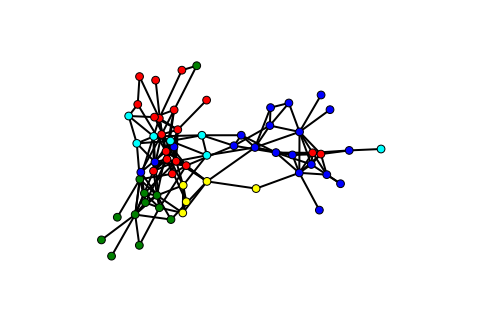

In [21]:
#infomap
G_im=G.copy()
color_map_im = []

attributes_2 = []
color_map_im = []
for nom in G_im.nodes():
    attributes_2.append([nom])
    
    
for node in labels_infomap:
    if node == 1.:
        color_map_im.append('blue')
    elif node ==2.:
        color_map_im.append('red')
    elif node == 3.:
        color_map_im.append('green')
    elif node == 4.:
        color_map_im.append('cyan')
    else:
        color_map_im.append('yellow')
          

for i in range(len(attributes_2)):
    G_im.nodes[attributes_2[i][0]]['Cluster'] = labels_infomap[i]

options = {
'node_size': 60,
'width': 2,
}

print("                                               (e) Kamada kawai layout")
nx.draw(G_im,node_color = color_map_im, **options)
plt.show()

In [22]:
import time

# def calculate_infomap(np_adj_list, method="infomap"):
#     g = igraph.Graph.Weighted_Adjacency(np_adj_list.tolist(),mode=igraph.ADJ_UPPER)
   
#     t0=time.time()
#     if method=="infomap":
#         labels = g.community_infomap(edge_weights="weight").membership
# #    labels = g.community_label_propagation(weights="weight").membership
#     if method=="fastgreedy":
#         labels = g.community_fastgreedy(edge_weights="weight").membership
   
#     print("Duración: {}s".format(time.time()-t0))
           
#     return labels

from __future__ import division

from functools import wraps
from itertools import product

import networkx as nx
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

__all__ = ['coverage', 'modularity', 'performance']


class NotAPartition(NetworkXError):
    """Raised if a given collection is not a partition.

    """

    def __init__(self, G, collection):
        msg = '{} is not a valid partition of the graph {}'
        msg = msg.format(G, collection)
        super(NotAPartition, self).__init__(msg)


def modularity(G, communities, weight='weight'):
    r"""Returns the modularity of the given partition of the graph.

    Modularity is defined in [1]_ as

    .. math::

        Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_ik_j}{2m}\right)
            \delta(c_i,c_j)

    where $m$ is the number of edges, $A$ is the adjacency matrix of
    `G`, $k_i$ is the degree of $i$ and $\delta(c_i, c_j)$
    is 1 if $i$ and $j$ are in the same community and 0 otherwise.

    Parameters
    ----------
    G : NetworkX Graph

    communities : list
        List of sets of nodes of `G` representing a partition of the
        nodes.

    Returns
    -------
    Q : float
        The modularity of the paritition.

    Raises
    ------
    NotAPartition
        If `communities` is not a partition of the nodes of `G`.

    Examples
    --------
    >>> G = nx.barbell_graph(3, 0)
    >>> nx.algorithms.community.modularity(G, [{0, 1, 2}, {3, 4, 5}])
    0.35714285714285704

    References
    ----------
    .. [1] M. E. J. Newman *Networks: An Introduction*, page 224.
       Oxford University Press, 2011.

    """
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm




In [42]:
def modularidad_4(G,labels_louvain,attributes):

    particion = []
    grupo1 = []
    grupo2 = []
    grupo3 = []
    grupo4 = []
    nombres = attributes.copy()

    for i in range(len(labels_louvain)):
        if labels_louvain[i] == 1.:
            grupo1.append(nombres[i][0])
        elif labels_louvain[i] ==2.:
            grupo2.append(nombres[i][0])
        elif labels_louvain[i] == 3.:
            grupo3.append(nombres[i][0])
        else:
            grupo4.append(nombres[i][0])


    particion.append(grupo1)
    particion.append(grupo2)
    particion.append(grupo3)
    particion.append(grupo4)
    M=modularity(G,particion)
    return M


In [45]:
def modularidad_5(G,labels_louvain,attributes):

    particion = []
    grupo1 = []
    grupo2 = []
    grupo3 = []
    grupo4 = []
    grupo5 = []
    nombres = attributes.copy()

    for i in range(len(labels_louvain)):
        if labels_louvain[i] == 1.:
            grupo1.append(nombres[i][0])
        elif labels_louvain[i] ==2.:
            grupo2.append(nombres[i][0])
        elif labels_louvain[i] == 3.:
            grupo3.append(nombres[i][0])
        elif labels_louvain[i] == 4.:
            grupo4.append(nombres[i][0])
        else:
            grupo5.append(nombres[i][0])


    particion.append(grupo1)
    particion.append(grupo2)
    particion.append(grupo3)
    particion.append(grupo4)
    particion.append(grupo5)
    M=modularity(G,particion)
    return M

In [47]:
M_bet = modularidad_5(G,labels_edgeBetweenness,attributes_1)
print(M_bet)

0.3247300344131952


In [52]:
M_lou = modularidad_4(G,labels_louvain,attributes)
print(M_lou)

0.5213994699576747
